# **Chapter 2: Foundations of Causal AI**
*-> Xây dựng nền tảng lý thuyết thống nhất cho suy luận nhân quả, bằng cách giới thiệu Structural Causal Models (SCMs), làm rõ những gì có thể và không thể suy ra về nhân quả, và chỉ ra vai trò bắt buộc của các giả định (thông qua causal diagrams) trong mọi suy luận vượt quá quan sát thuần túy.*

    2.1 Structural Causal Models
    2.2 The Pearl Causal Hierarchy (PCH)
    2.3 The Causal Hierarchy Theorem (CHT)
    2.4 Structural Assumptions & Testable Implications
    2.5 Exercises

## 2.1 Structural Causal Models (SCMs)

**Structural Causal Models (SCMs)** là khuôn khổ trung tâm để mô tả **các cơ chế nhân quả** chi phối một hiện tượng hoặc **môi trường** nơi tác tử AI hoạt động.

### Ý tưởng chính
- Một **SCM** mô hình hóa thế giới thông qua:
  - Các **cơ chế nhân quả ổn định**
  - Quan hệ nhân quả giữa các biến
  - Các nguồn **biến thiên ngoại sinh**
- Mọi bài toán **suy luận nhân quả** đều có thể xem là việc đặt câu hỏi về **các cơ chế này** hoặc **thuộc tính của chúng**.

Trong cuốn sách, chúng ta **coi SCM là đại diện trực tiếp cho hệ thống thực**, không tách biệt hai khái niệm này.

---

> ***Def 2.1.1**  Structural Causal Model (SCM). A structural causal model $\mathcal{M}$ is a 4-tuple $\langle U, V, F, P(U) \rangle$, where:*
> 1. Tập $U$ - biến ngoại sinh: Tập hợp RV, đại diện cho tất cả các nguồn biến thiên mà mô hình không giải thích (nhiễu, sai số hệ thống, hoặc các yếu tố tiềm ẩn). *Các biến trong U được giả định là độc lập với nhau, hay ($U_i \perp U_j$)*
> 2. Tập $V$ - biến nội sinh: Tập hợp các biến PHỤ THUỘC, giá trị của chúng là deterministic dựa trên các biến khác trong hệ thống. ($U \cup V$)
> 3. $F$ là tập hợp các hàm cấu trúc, mỗi biến $V_i$ có một hàm riêng $f_i$  
    >  $$v_i \leftarrow f_i(pa_i, u_i)$$
    >- $Pa_i$ (Parents): là tập hợp các biến nội sinh trực tiếp gây ra (cause) $V_i$.  
    >- $U_i$: Là biến ngoại sinh ảnh hưởng đến $V_i$.  
    >-> chỉ ra hướng đi một chiều của nhân quả thông qua toán tử "$\leftarrow$". Ví dụ: Lực ($\leftarrow$) bằng Khối lượng $\times$ Gia tốc.
> 4. $P(U)$ - phân phối xác suất của U - biến ngoại sinh
    >- vì ta không biết cụ thể giá trị của các biến ngoại sinh -> dùng phân phối xác suất. Về ý nghĩa, nó là nguồn gốc của tính ngẫu nhiên (uncertainty) trong dữ liệu.

--- 
Trong thống kê truyền thống, chúng ta thường coi dữ liệu là tất cả, tuy nhiên trong SCMs chia thành 2 vùng:
- Biến nội sinh $V$: những gì ta chọn để đưa vào mô hình. Mỗi biến $V_i$ được xác định hoàn toàn bởi các biến khác trong mô hình ($P(a_i)$) và một yếu tố ngoại sinh ($U_i$).
- Biến ngoại sinh $U$: các yếu tố còn lại ngoài vũ trụ. $P(U)$ đại diện cho "trạng thái của vũ trụ".

* NOTE!!!
- Tính chất *QUAN TRỌNG* của hàm $v_i \leftarrow f_i(pa_i, u_i)$: **TÍNH BẤT BIẾN - INVARIANCE**
    - Trong thống kê truyền thống, thay đổi cách lấy mẫu -> tham số hồi quy có thể thay đổi.
    - Trong SCM, hàm $f_i$ được coi là 1 **quy luật tự nhiên** -> Trừ khi thay đổi $V_i$, giá trị của $f_i$ không thay đổi nếu $U_i$  thay đổi -> **TÍNH KHÁI QUÁT HÓA - GENERALIZATION** 

- 1 mô hình SCM được coi là Markovian nếu các biến ngoại sinh $U_i$, $U_j$ độc lập hay $U_i \perp U_j$ với $i \neq j$. Nghĩa là không có yếu tố ẩn nào (giao giữa 2 biến ngoại sinh) gây ảnh hưởng đồng thời lên 2 biến nội sinh khác nhau.
    - Ý nghĩa: điều này dùng để mô hình hóa các **yếu tố chưa quan sát được (unobserved confounders). VD: "lối sống" ảnh hưởng đến cả "chế độ ăn" và "sức khỏe" nhưng không có trong dữ liệu.

**Example 2.1**

Xét một trò chơi may rủi được mô tả bởi mô hình nhân quả cấu trúc (Structural Causal Model – SCM)

$$
\mathcal{M}_1
= \langle
\mathcal{U} = \{U_1, U_2\},
\mathcal{V} = \{X, Y\},
\mathcal{F},
P(U_1, U_2)
\rangle,
$$

trong đó tập các phương trình cấu trúc $\mathcal{F}$ được cho bởi

$$
\begin{aligned}
X &\leftarrow U_1 + U_2, \\
Y &\leftarrow U_1 - U_2.
\end{aligned}
\tag{2.2}
$$

Ngoài ra, các biến ngoại sinh có phân phối xác suất

$$
P(U_i = k) = \frac{1}{6},
\quad i = 1, 2,\; k = 1, \ldots, 6.
$$

**Nói cách khác**, mô hình cấu trúc này biểu diễn bối cảnh trong đó hai con xúc xắc được gieo,
nhưng ta chỉ quan sát được **tổng** ($X$) và **hiệu** ($Y$) của các giá trị thu được.
Miền giá trị của các biến quan sát là

$$
\mathrm{Val}(X) = \{2, \ldots, 12\},
\qquad
\mathrm{Val}(Y) = \{-5, \ldots, 0, \ldots, 5\}.
$$

=> Ý nghĩa:
- SCM là "máy phát dữ liệu" - Data-generating process:
    - về mặt toán học, nếu biết kết quả của 2 con xúc xắc ($U_1, U_2$) thì giá trị $X$ (tổng) và $Y$ (hiệu) là deterministic, không có gì ngẫu nhiên.
    - về mặt thống kê, sự ngẫu nhiên của $X$ và $Y$ thực chất là "nhân quả" từ sự ngẫu nhiên trong tập ngoại sinh $U$.  
    --> SCM định nghĩa thực tại là 1 tập hợp các hàm cố định $\mathcal{F}$. Dữ liệu là "nhân quả" của việc chạy các hàm đó với biến ngẫu nhiên (RV) từ vũ trụ -> $U$.

- Correlation $\neq$ Causation
    - Theo quan sát, ta có: Nếu $X = 12$ thì chắc chắn $Y=0$ => $X$ và $Y$ tương quan cao => $X$ gây ra $Y$ hoặc ngược lại???
    - Thực tế, $X$ không gây ra $Y$ và ngược lại, chúng có tương quan vì có chung nguồn gốc (Common Causes) là $U_1$ và $U_2$.  
    --> Việc tìm thấy mối liên hệ toán học trong dữ liệu KHÔNG cho phép ta kết luận về HƯỚNG tác động nhân quả.

- Nền tảng của Interventions
    Giả định:
    - Nếu bạn nhấc con xúc xắc thứ 1 và đặt nó vào mặt 6 ($do(U_1=6)$), cả $X$ và $Y$ đều thay đổi.
    - Nhưng nếu chỉ can thiệp vào $X$ (ví dụ sửa tổng ghi trên giấy thành 10), thì giá trị của $Y$ (hiệu) và các con xúc xắc $U$ KHÔNG thay đổi.  
    --> SCM giúp ta dự đoán chính xác kết quả của các hành động này bằng cách thay đổi các hàm số tương ứng, điều mà các mô hình thống kê thuần túy KHÔNG làm được 1 cách nhất quán.

---

**Example 2.2**

Xét mô hình nhân quả cấu trúc (SCM)

$$
\mathcal{M}_2
= \langle
\mathcal{V} = \{X, Y, Z\},
\mathcal{U} = \{U_r, U_x, U_y, U_z\},
\mathcal{F},
P(U_r, U_x, U_y, U_z)
\rangle,
$$

trong đó các biến nội sinh $\mathcal{V}$ lần lượt biểu diễn:
- $X$: một biện pháp điều trị cụ thể (ví dụ: thuốc),
- $Y$: kết cục (ví dụ: sống sót),
- $Z$: sự xuất hiện hay không của một triệu chứng (ví dụ: tăng huyết áp).

Biến ngoại sinh $U_r$ biểu thị việc một cá nhân có hay không khả năng kháng thể tự nhiên đối với
căn bệnh, còn $U_x$, $U_y$, $U_z$ là các nguồn biến thiên bên ngoài mô hình ảnh hưởng lần lượt
đến $X$, $Y$ và $Z$.

Trong quần thể này, những cá nhân có khả năng kháng bệnh ($U_r = 1$) có xu hướng sống sót
($Y = 1$) bất kể phương pháp điều trị nào được áp dụng.
Khi triệu chứng xuất hiện ($Z = 1$), các bác sĩ sẽ cố gắng can thiệp bằng cách kê đơn thuốc
($X = 1$).
Mặc dù phương pháp điều trị ($X = 1$) giúp ích cho những bệnh nhân có khả năng kháng bệnh
($U_r = 1$), nó lại ***làm tình trạng xấu đi đối với những người không có khả năng kháng bệnh
($U_r = 0$)***.

Cụ thể, các cơ chế nhân quả trong tập $\mathcal{F}$ được xác định như sau:

$$
\mathcal{F} =
\begin{cases}
Z \leftarrow \mathbb{1}(U_r = 1, U_z = 1), \\
X \leftarrow \mathbb{1}(Z = 1, U_x = 1) + \mathbb{1}(Z = 0, U_x = 0), \\
Y \leftarrow \mathbb{1}(X = 1, U_r = 1)
        + \mathbb{1}(X = 0, U_r = 1, U_y = 1)
        + \mathbb{1}(X = 0, U_r = 0, U_y = 0).
\end{cases}
\tag{2.3}
$$
**=> Ý nghĩa:**
- Cơ chế của triệu chứng ($Z$): Triệu chứng ($Z=1$) chỉ xuất hiện ở những người có kháng thể tự nhiên ($U_r=1$) và bị tác động bởi yếu tố ngoại sinh ($U_z=1$). Nếu không có kháng thể ($U_r=0$) thì không bao giờ có triệu chứng ($Z=0$).
- Cơ chế của điều trị ($X$): Bác sĩ kê đơn dựa trên triệu chứng ($Z$)
    - Nếu $Z=1$ thì xs kê đơn cao <=> $P(U_x=1)=0.9$
    - Ngược lại $Z=0$ thì xs kê đơn thấp <=> $P(U_x=0)=0.1$.
- Cơ chế của sự sống sót ($Y$): 
    $$
    Y \leftarrow
    \underbrace{\mathbb{1}(X = 1, U_r = 1)}_{\text{Kịch bản A}}
    +
    \underbrace{\mathbb{1}(X = 0, U_r = 1, U_y = 1)}_{\text{Kịch bản B}}
    +
    \underbrace{\mathbb{1}(X = 0, U_r = 0, U_y = 0)}_{\text{Kịch bản C}}
    $$
    - TH1 ($X=1, U_r=1$): nếu bạn có kháng thể và uống thuốc, bất kể các yếu tố ngoại sinh $U_y=1 \| U_y=0$ (hay dù bạn may mắn đến đâu) => sống.
    - TH2 ($X=1, U_r=0$): nếu bạn không có kháng thể nhưng vẫn uống thuốc, bất kể các yếu tố ngoại sinh $U_y=1 \| U_y=0$ (hay dù bạn may mắn đến đâu) => đờ i đi
    - TH3 - natural baseline ($X=0$): 
        - Nhóm có kháng thể ($U_r=1$): họ sẽ sống sót nếu môi trường/yếu tố ngoại sinh thuận lợi ($U_y=1$) và đi nếu môi trường khắc nghiệt/không bình thường ($U_y=0$).
        - Nhóm KO có kháng thể ($U_r=0$): họ sẽ đi nếu môi trường/yếu tố ngoại sinh bình thường ($U_y=1$) nhưng sống sót nếu ($U_y=0$) - môi trường đặc biệt. 

---


## **2.2 The Pearl Causal Hierarchy (PCH)**

### **2.2.1 PCH, Layer 1 - Seeing**
> ***Def 2.2.1 Layer 1 Valuation - "Observing".***  
    Một mô hình SCM $\mathcal{M} = \langle U, V, \mathcal{F}, P(U) \rangle$ xác định một PHÂN PHỐI XÁC SUẤT ĐỒNG THỜI (joint probability distribution) $P_{\mathcal{M}}(V)$ sao cho  
    với mọi $Y \subseteq V$:
>$$
>    P_{\mathcal{M}}(\mathbf{y}) = \Sigma_{u} \mathbb{1} (\mathbf{Y(u)} = \mathbf{y})\mathbf{P(u)}, 
>$$
>trong đó $\mathbf{Y(u)}$ là nghiệm của $\mathbf{Y}$ sau khi đánh giá (evaluate) tập phương trình $\mathcal{F}$ với $U=u$.

**NOTE!!**
- $\mathbf{P(u)}$: Xác suất của một trạng thái cụ thể của vũ trụ/biến ngoại sinh.
- $\mathbf{Y(u)}$: Giá trị của biến nội sinh Y sau khi hệ các hàm $\mathcal{F}$ tính toán xong với input là $u$.
- Hàm indicator $\mathbb{1} (\mathbf{Y(u)} = \mathbf{y})$
--> ý nghĩa: Toàn bộ phân phối xác suất quan sát được (deterministic) $P(V)$ thực chất là kết quả của việc truyền phân phối $\mathbf{P}(U)$ qua tập hợp các hàm $\mathcal{F}$.

### **2.2.2 PCH, Layer 2 - Doing**

> ***Def 2.2.2 Submodel — "Interventional SCM".***  
    Cho $\mathcal{M}$ là một mô hình nhân quả, $\mathbf{X}$ là tập hợp các biến thuộc $\mathbf{V}$, và $\mathbf{x}$ là 1 hiện thực cụ thể (giá trị cụ thể) của $\mathbf{X}$. Một mô hình con $\mathcal{M_{\mathbf{x}}}$ là mô hình nhân quả:  
>$$
>    \mathcal{M}_{\mathbf{x}} = \langle \mathbf{U}, \mathbf{V}, \mathcal{F}_{\mathbf{x}}, \mathbf{P(U)} \rangle
>$$
>trong đó $\mathcal{F}_{\mathbf{x}} = \{ f_i : V_i \notin \mathbf{X} \} \cup \{ \mathbf{X} \leftarrow \mathbf{x} \}$
>  
>Nói cách khác, việc thực hiện 1 intervention được mô hình hóa bằng cách **thay thế các cơ chế (tự nhiên) ban đầu** liên kết với các biến trong $X$ bằng một hằng số $x$. Thao tác này được biễu diễn qua **toán tử "$do$"**.   
>Kí hiệu $do(X=x)$ được dùng để phân biệt với xác suất có điều kiện thông thường:
    >- $\mathbf{P}(Y \| X=x)$: Xs của Y khi ta thấy X có giá trị x trong tự nhiên. (L1)
    >- $\mathbf{P}(do(X=x))$: Xs của Y khi ta ép X phải nhận giá trị x. (L2)  
>
> Ảnh hưởng của can thiệp lên một biến kết cục $Y$
thường được gọi là **kết cục tiềm năng (potential outcome)**.  
> ***Def 2.2.3 — Potential Outcome / Potential Response.***  
>Cho $X$ và $Y$ là hai tập biến trong $\mathcal{V}$, và $u$ là một đơn vị.
 Kết cục tiềm năng $Y_x(u)$ được định nghĩa là nghiệm của $Y$ trong tập phương trình $\mathcal{F}_x$ đối với SCM $\mathcal{M}$ (tức là $Y_{\mathcal{M}_x}(u)$).
 Nói cách khác,
>
>$$
>   Y_x(u) \triangleq Y_{\mathcal{M}_x}(u).
>$$
>
>Tức là $Y_{\mathcal{M}_x}(u)$ thu được bằng cách tính $Y(u)$
>trong mô hình con $\mathcal{M}_x$.
>
>Một SCM cho phép gán giá trị cho các đại lượng can thiệp như sau.
>
>***Def 2.2.4 Layer 2 Valuation – "Intervening".***  
>Một SCM $\mathcal{M} = \langle \mathcal{U}, \mathcal{V}, \mathcal{F}, P(U) \rangle$ sinh ra một họ các phân phối xác suất đồng thời trên $\mathcal{V}$, mỗi phân phối tương ứng với một can thiệp $x$.
>Với mọi $Y \subseteq \mathcal{V}$:
>
>$$
>   P_{\mathcal{M}}(y_x) = \sum_u \mathbb{1}(Y_x(u) = y)\, P(u).
>$$
>-->ý nghĩa thống kê: $P(Y | do(x))$ là giá trị kỳ vọng của hàm chỉ tiêu trên toàn bộ phân phối của các biến ngoại sinh $U$.  
>**NOTE!!**  
>Phân phối $P(Y_x)$ được định nghĩa trong ***Def 2.2.4***
>thường được viết là $P(Y \mid do(x))$,
>và từ đây về sau chúng ta sẽ sử dụng ký hiệu này
>trong bối cảnh của **Tầng 2 của PCH**.
>
>Theo quy ước, toán tử $do(x)$ tác động lên **toàn bộ biểu thức**
>trong trường hợp có điều kiện, cụ thể là:
>
>$$
>P(Y \mid do(x), z)=P(Y_x \mid z_x)=\frac{P(Y_x, z_x)}{P(z_x)}=\frac{P(Y, z \mid do(x))}{P(z \mid do(x))}.\tag{2.9}
>$$
>
>Trong đó, biểu thức cuối cùng thể hiện một cách rõ ràng
>một đại lượng thuộc **Tầng 2 (Layer 2)** của Thứ bậc Nhân quả Pearl.
>
>Hơn nữa, theo ngữ nghĩa của phép can thiệp $do(x)$,
>rõ ràng rằng phân phối của các biến bị can thiệp
>phải thỏa mãn một tính chất gọi là **tính hiệu lực (effectiveness)**.
>
>***Def 2.2.5 — Effectiveness.***  
>Một phân phối can thiệp đồng thời $P(v \mid do(x))$
>được gọi là **thỏa mãn tính hiệu lực**
>nếu với mọi $V_i \in X$:
>
>$$
>P(v_i \mid do(x)) =
>\begin{cases}
>1, & \text{nếu } v_i \text{ phù hợp (consistent) với } x, \\
>0, & \text{ngược lại}.
>\end{cases}
>$$

#### **Hiệu ứng Nhân quả Trung bình (Average Causal Effect – ACE)**

Trong các bài toán kinh tế và kinh tế lượng, **Hiệu ứng Nhân quả Trung bình (ACE)**
là một trong những chỉ số quan trọng nhất, được định nghĩa là:

$$
\mathrm{ACE}
=
\mathbb{E}\!\left[Y_{X=1}\right]
-
\mathbb{E}\!\left[Y_{X=0}\right].
$$

Trong đó:
- $Y_{X=1}$ là kết cục tiềm năng khi thực hiện can thiệp $X = 1$,
- $Y_{X=0}$ là kết cục tiềm năng khi thực hiện can thiệp $X = 0$.

**Diễn giải:**
- Nếu $\mathrm{ACE} > 0$: hành động (hay chính sách) $X$ có **tác động tích cực trung bình**.
- Nếu $\mathrm{ACE} < 0$: hành động (hay chính sách) $X$ có **tác động tiêu cực trung bình**.

### **2.2.3 PCH, Layer 3 - Counterfactuals/Imagining**
**`Bản chất: So sánh các “vũ trụ song song” trên cùng một thực thể ($u$)`**

Sự khác biệt **cốt lõi** giữa **Tầng 2** và **Tầng 3** của Thứ bậc Nhân quả Pearl
nằm ở khái niệm **đơn vị (unit $u$)**.

- **Tầng 2 — Can thiệp (Intervention):**  
  Ta thay đổi hành động $X$ cho **một quần thể (hoặc một nhóm đơn vị) mới**.
  Các đơn vị này được lấy mẫu theo phân phối $P(U)$,
  và **không có thông tin về lịch sử hay định danh cá nhân** của từng đơn vị cụ thể.

- **Tầng 3 — Phản thực (Counterfactual):**  
  Ta **giữ nguyên danh tính của một đơn vị cụ thể** $u$
  (bao gồm toàn bộ các yếu tố ẩn $U = u$),
  rồi **thay đổi hành động $X$** để quan sát
  kết quả $Y$ sẽ thay đổi như thế nào
  trong một **vũ trụ giả định** khác.

Nói cách khác:
- Tầng 2 trả lời câu hỏi:  
  *“Nếu ta làm $X=x$, điều gì sẽ xảy ra **trung bình** trong quần thể?”*
- Tầng 3 trả lời câu hỏi:  
  *“Với **chính cá nhân này**, điều gì **đã** hoặc **sẽ** xảy ra
  nếu ta hành động khác đi?”*


> ***Def 2.2.6 — Layer 3 Valuation***
>
> Một mô hình nhân quả cấu trúc (SCM) 
> $$
> \mathcal{M} = \langle U, V, F, P(U) \rangle
> $$ 
> sinh ra (induces) một **họ các phân phối xác suất chung** 
> trên các biến phản thực 
> $Y_x, \ldots, Z_w,$  
>
> với mọi tập con 
> $Y, Z, \ldots, X, W \subseteq V,$  
>
> được xác định như sau: 
> $P_{\mathcal{M}}(y_x, \ldots, z_w) = \sum_u \mathbf{1} \bigl( Y_x(u) = y, \ldots, Z_w(u) = z \bigr) P(u).$  
>
> Lưu ý rằng vế trái của biểu thức trên chứa **các biến với chỉ số dưới khác nhau**.
> Về mặt cú pháp, các chỉ số này mã hóa những **“vũ trụ phản thực” khác nhau**
> (*counterfactual worlds*) mà ta quan tâm.
>
Quy trình đánh giá (**evaluation**) ngầm định trong phương trình trên
có thể được mô tả qua ba bước sau:

**1. Xây dựng các mô hình con phản thực**

 Với mỗi tập chỉ số tương ứng với mỗi tập biến
 (ví dụ: các chỉ số $X, \ldots, W$ ứng với các biến $Y, \ldots, Z$),
 ta thay thế các cơ chế cấu trúc liên quan
 bằng các hằng số tương ứng với phép can thiệp,
 từ đó tạo ra các tập cơ chế đã chỉnh sửa
 $
 \mathcal{F_x}, \ldots, \mathcal{F_w}
 $
 và hình thành các **mô hình con**
 $
 \mathcal{M_x}, \ldots, \mathcal{M_w}
 $
 của mô hình gốc $\mathcal{M}$.

 **2. Đánh giá kết quả tiềm năng cho từng đơn vị**

 Với mỗi đơn vị $U = u$,
 một “phiên bản khác của Tự nhiên” sẽ đánh giá
 các cơ chế đã chỉnh sửa
 (ví dụ: $\mathcal{F_x}, \ldots, \mathcal{F_w}$)
 theo một thứ tự hợp lệ
 (nghĩa là mọi biến ở vế trái đều được đánh giá
 sau các biến ở vế phải),
 nhằm thu được **kết quả tiềm năng**
 (*potential outcomes*) của các biến quan sát được.

 **3. Tích lũy xác suất**

 Khối xác suất $P(U = u)$
 được cộng dồn cho mọi giá trị $u$
 sao cho các kết quả phản thực là nhất quán
 với các sự kiện đang xét,
 chẳng hạn:
 $
 Y_x = y, \ldots, Z_w = z,
 $
 tức là:
 $
 Y = y, \ldots, Z = z
 $
 lần lượt trong các mô hình con
 $
 \mathcal{M_x}, \ldots, \mathcal{M_w}.
 $

 **NOTE!!! CỐT LÕI NHÂN QUẢ PHẢN THỰC**

 **PN — Probability of Necessity:**  
 *X có **cần thiết** để Y xảy ra không?*  
 $$\mathrm{PN}=P(Y_{x=0}=0\mid X=1,Y=1)$$

 **PS — Probability of Sufficiency:**  
 *X có **đủ** để tạo ra Y không?*  
 $$\mathrm{PS}=P(Y_{x=1}=1\mid X=0,Y=0)$$

 **Nested Counterfactuals:**  
 *So sánh **các vũ trụ song song trên cùng một đơn vị \(u\)** để tách*
 **tác động trực tiếp** vs **gián tiếp**  
 $$Y_{x,\,Z_{x'}}$$

 **Không có counterfactual → không phải nhân quả.**

 ---

## ***2.3 The Causal Hierarchy Theorem***
> **Definition 2.3.1 — Symbolic Languages $\mathcal{L}_1, \mathcal{L}_2, \mathcal{L}_3$.**  
> Let variables $V$ be given and $X, Y, Z \subseteq V$.
> Each language $\mathcal{L}_i$, $i = 1,2,3$, consists of (Boolean combinations of)
> inequalities between polynomials over terms $P(\alpha)$, where $P(\alpha)$ is an
> $\mathcal{L}_i$ term, defined as follows:
>
> - **$\mathcal{L}_1$** terms are those of the form $P(Y = y)$, encoding the probability
>   that $Y$ takes on value $y$;
>
> - **$\mathcal{L}_2$** terms additionally include probabilities of *conditional*
>   expressions, $P(Y_x = y)$, giving the probability that variable $Y$ would take
>   value $y$, were $X$ to take value $x$;
>
> - **$\mathcal{L}_3$** terms encode probabilities over *conjunctions* of conditional
>   (i.e., $\mathcal{L}_2$) expressions,
>   $$
>   P(Y_x = y, \ldots, Z_w = z),
>   $$
>   symbolizing the joint probability that all of these conditional statements hold
>   simultaneously.
> **Định nghĩa 2.3.2 — Pearl Causal Hierarchy (PCH)**  
> Cho một **SCM đầy đủ** $M^*$, PCH là **tập hợp tất cả** các phân phối:
> - Quan sát ($L_1$)
> - Can thiệp ($L_2$)
> - Phản thực tại ($L_3$)  
> được **sinh ra bởi cùng một mô hình $M^*$**.

---

**NOTE!!**
- **Một SCM duy nhất ⇒ xác định toàn bộ 3 tầng của PCH**
- Không có mâu thuẫn giữa các tầng nếu SCM là đúng
> Câu hỏi trung tâm của suy luận nhân quả  
> **Biết tầng thấp (ví dụ $L_1$ – dữ liệu quan sát),  
> có suy ra được tầng cao hơn ($L_2$, $L_3$) hay không?**

> **Định nghĩa 2.3.3 — Sự sụp đổ (Collapse) đối với $M^*$**  
> Tầng $j$ được gọi là **sụp đổ về tầng $i$** ($i < j$) đối với mô hình $M^*$ nếu:
>
> Với **mọi** mô hình $M$ có **cùng giá trị ở tầng $i$** như $M^*$  
> thì **bắt buộc** cũng có **cùng giá trị ở tầng $j$** như $M^*$.

---

### Ý nghĩa
- Nếu **$L_2$ sụp đổ về $L_1$** ⇒ **Correlation = Causation**
- Có thể suy ra **kết quả can thiệp chỉ từ dữ liệu quan sát**
- Đây là trường hợp **rất đặc biệt**, gần như không xảy ra trong thực tế

---

## Định lý Cấu trúc Nhân quả (Causal Hierarchy Theorem – CHT)

> **Định lý 2.3.1 & 2.3.3 — CHT**

### Phát biểu không chính thức
> **Pearl Causal Hierarchy hầu như không bao giờ sụp đổ**  
> Với gần như mọi SCM, các tầng **luôn tách biệt**.

### Phát biểu chính thức
> Xét theo **độ đo Lebesgue** trên không gian các lớp tương đương của SCM,  
> tập các mô hình mà tại đó xảy ra **sự sụp đổ của PCH có độ đo bằng 0**.

---

### Hệ quả 2.3.2
> **Muốn trả lời câu hỏi ở tầng $i$,  
> cần dữ liệu hoặc giả định ở tầng $i$ hoặc cao hơn.**

> *No causes in, no causes out.*

---

## Ví dụ minh họa cho CHT ($M^*, M, M'$)

### $L_1$ giống nhau – $L_2$ khác nhau
- Hai mô hình có **cùng dữ liệu quan sát**: $X \perp Y$
- Mô hình 1: $X$ **không ảnh hưởng** đến $Y$
- Mô hình 2: $X$ **tác động mạnh** đến $Y$

⇒ **Không suy được nhân quả từ tương quan**

---

### $L_2$ giống nhau – $L_3$ khác nhau
- Hai mô hình cho **kết quả can thiệp giống nhau**
- Nhưng trả lời **trái ngược** cho câu hỏi phản thực tại:
  > “Nếu bệnh nhân **đã không uống thuốc** thì liệu có sống sót không?”

⇒ **Phản thực tại không suy được chỉ từ thí nghiệm**

---


## 2.4 Structural Assumptions & Testable Implications

---

### 2.4.1 Causal Diagrams

**Definition 2.4.1 — Causal Diagram**

Xét một SCM  
$\mathcal{M} = \langle U, V, F, P(U) \rangle$.

Đồ thị $G$ được gọi là **causal diagram** (của $\mathcal{M}$) nếu được xây dựng như sau:

#### (1) Đỉnh (Vertices)
- Thêm một đỉnh cho **mỗi biến nội sinh** trong tập $V$.

#### (2) Cạnh có hướng (Directed edges)
- Thêm cạnh $V_j \to V_i$ với mọi $V_i, V_j \in V$ nếu $V_j$ xuất hiện như **đối số** của hàm cấu trúc $f_i \in F$.

**Diễn giải toán học → nhân quả**

- **Toán học:**  
  Nếu phương trình cấu trúc của $V_i$ có dạng  
  $V_i = f_i(V_j, U_i)$,  
  thì $V_j$ xuất hiện như một **đối số trực tiếp** của hàm $f_i$, hay nói cách khác, $V_j$ trực tiếp quyết định một phần giá trị của $V_i$.

- **Ý nghĩa nhân quả:**  
  Giá trị của $V_j$ **trực tiếp quyết định một phần** giá trị của $V_i$.  
  Do đó, $V_j$ là **nguyên nhân trực tiếp (Direct Cause)** của $V_i$.

#### (3) Cạnh hai chiều (Bidirected edges)
- Thêm cạnh $V_j \leftrightarrow V_i$ với mọi $V_i, V_j \in V$ nếu:
  - các biến ngoại sinh tương ứng $U_i, U_j \subset U$ **tương quan**, hoặc
  - các hàm $f_i$ và $f_j$ **chia sẻ cùng một biến ngoại sinh** $U \in U$.

**Điều kiện (Bidirected edge):**
- $U_i$ và $U_j$ **có tương quan** hoặc thực chất **là cùng một biến ẩn $U$** chưa được quan sát.

**Ý nghĩa nhân quả:**
- Biểu diễn **nhiễu chung (Confounding)**.
- Khi thấy $V_j \leftrightarrow V_i$, đó là một cảnh báo:
  - Hai biến có vẻ liên quan với nhau  
  - Nhưng **không thể kết luận quan hệ nhân quả trực tiếp**  
  - Có thể tồn tại **một biến thứ ba chưa quan sát** đang ảnh hưởng đồng thời lên cả hai.

#### Ý nghĩa cốt lõi
- **Cạnh có hướng:** quan hệ nhân quả trực tiếp  
- **Cạnh hai chiều:** nhiễu chung / confounding không quan sát được  
- **Causal diagram:** biểu diễn đồ thị tối giản của toàn bộ SCM

---

### 2.4.2 The D-separation Criterion (Directional Separation)

#### 1. Bản chất

**Ba lớp thông tin khác nhau:**

- **$M^*$ — Structural Causal Model (Ground Truth):**
  - Sự thật khách quan: các hàm cấu trúc và biến nhiễu thực sự
  - Không bao giờ quan sát trực tiếp được

- **$G$ — Causal Diagram:**
  - Bản tóm lược (coarsening) của $M^*$
  - Chỉ cho biết *ai tác động lên ai*

- **$P(V)$ — Observational Distribution:**
  - Dữ liệu quan sát (CSV, Excel, logs, …)
  - Thứ duy nhất ta thực sự có

**Câu hỏi cốt lõi:**  
Làm sao biết đồ thị $G$ mình vẽ ra là đúng?

- Ta không biết hàm $\mathbb{f}$ hay biến ngoại sinh $\mathbf{U}$
- Nếu $G$ đúng, nó để lại **dấu vết (traces)** trong $P(V)$
- Các dấu vết này là **quan hệ độc lập có điều kiện**
- **D-separation** là quy tắc hình học để đọc các quan hệ đó

---

#### 2. Các mẫu bộ ba cơ bản (The Basic Triplets)

Dòng chảy thông tin giữa $X$ và $Y$ qua nút trung gian $Z$ được chia thành hai nhóm.

##### A. Nhóm “Bình thường” (Normal): Chain & Fork
- **Trạng thái mặc định:** Mở (Active)
- **Khi điều kiện hóa trên $Z$:** Bị chặn (Blocked)

**Chuỗi (Causal Chain):**  
$X \to Z \to Y$  
($Z$ là biến trung gian)

**Cái dĩa (Fork):**  
$X \leftarrow Z \to Y$  
($Z$ là nguyên nhân chung / nhiễu)

**Hệ quả:**
- $(X \not\perp\!\!\perp Y)$  
- $(X \perp\!\!\perp Y \mid Z)$

##### B. Nhóm “Bất thường” (Abnormal): Collider
- **Trạng thái mặc định:** Bị chặn (Blocked)
- **Khi điều kiện hóa trên $Z$ (hoặc con cháu của $Z$):** Mở (Active)

**Hội tụ (Collider):**  
$X \to Z \leftarrow Y$  
($Z$ là kết quả chung)

**Explaining Away:**  
Biết $Z$ làm các nguyên nhân độc lập ($X, Y$) trở nên phụ thuộc.

**Hệ quả:**
- $(X \perp\!\!\perp Y)$  
- $(X \not\perp\!\!\perp Y \mid Z)$

---

#### 3. Định nghĩa Hình học Tổng quát (Def 2.4.3)

Một đường đi $p$ giữa $X$ và $Y$ bị **chặn (Blocked)** bởi tập $\mathbf{Z}$ nếu tồn tại
một nút $B$ trên $p$ sao cho:

- $B$ là **Chain hoặc Fork** và $B \in \mathbf{Z}$
- $B$ là **Collider** và cả $B$ lẫn các hậu duệ của $B$ **không thuộc** $\mathbf{Z}$

**Kết luận:**
$$
(X \perp\!\!\perp Y \mid \mathbf{Z})_G
$$

---

#### 4. Thuật toán kiểm tra D-separation (D-SEPARATION-CHECK)

**Vấn đề:**  
Số đường đi tăng theo hàm mũ $O(2^n)$.

**Giải pháp:**
1. Giữ lại các nút là **tổ tiên của $X, Y, Z$**
2. **Moralization:** nối cha mẹ của collider được kích hoạt
3. **BFS:** tìm đường đi trên đồ thị vô hướng

**Hệ quả:**  
Độ phức tạp $O(n+m)$.

---



Đang chạy benchmark... (Có thể mất vài giây ở các size lớn)
Testing with 9 nodes...
Testing with 12 nodes...
Testing with 15 nodes...
Testing with 18 nodes...
Testing with 21 nodes...


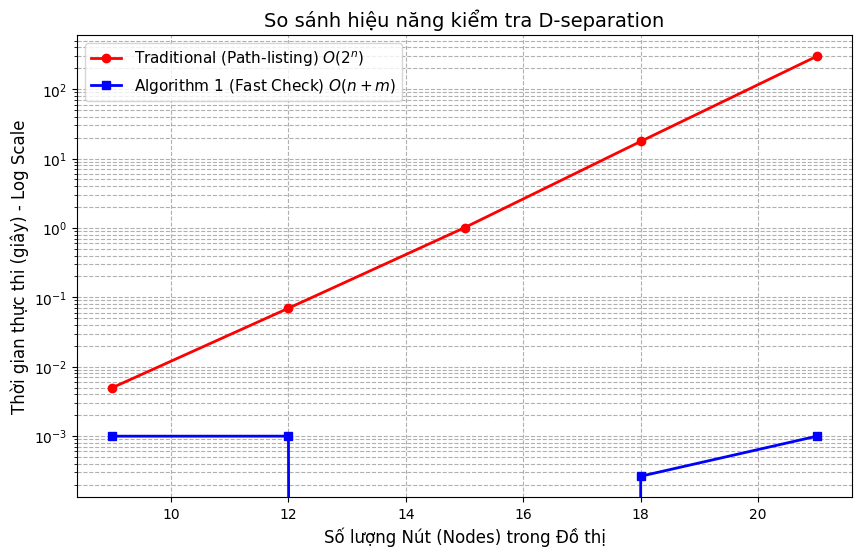

In [ ]:
import networkx as nx
import time
import matplotlib.pyplot as plt
import random

# ==============================================
# 1. HELPER FUNCTIONS
# ==============================================

def get_ancestors(dag, nodes):
    """Tìm tập hợp tổ tiên của một nhóm nút."""
    ancestors = set(nodes)
    for node in nodes:
        try:
            ancestors.update(nx.ancestors(dag, node))
        except nx.NetworkXError:
            pass # Bỏ qua nếu nút không có trong đồ thị
    return ancestors

def generate_dense_dag(num_layers, nodes_per_layer):
    """
    Cơ chế: Mọi nút ở lớp i đều nối đến tất cả các nút ở lớp i+1.
    -> Số lượng con đường từ nút đầu đến nút cuối sẽ bùng nổ theo cấp số nhân (nodes_per_layer^num_layers). 
    Đây là cạm bẫy lý tưởng để thử thách thuật toán truyền thống.
    """
    G = nx.DiGraph()
    layers = []
    count = 0
    for i in range(num_layers):
        layer_nodes = []
        for j in range(nodes_per_layer):
            node_name = count
            G.add_node(node_name)
            layer_nodes.append(node_name)
            count += 1
        layers.append(layer_nodes)
    
    for i in range(num_layers - 1):
        for u in layers[i]:
            for v in layers[i+1]:
                G.add_edge(u, v)
                
    # Trả về đồ thị và các nút đầu/cuối/giữa để test
    start_node = layers[0][0]
    end_node = layers[-1][-1]
    # Chọn một vài nút ở lớp giữa làm điều kiện Z
    middle_layer_idx = num_layers // 2
    z_nodes = layers[middle_layer_idx][:max(1, nodes_per_layer//2)]
    
    return G, [start_node], [end_node], z_nodes

# ==============================================
# 2. THUẬT TOÁN TRUYỀN THỐNG (Path-listing)
# ==============================================

def is_path_blocked(dag, path, Z_set):
    """Kiểm tra một con đường cụ thể có bị chặn không."""
    Z_set = set(Z_set)
    for i in range(1, len(path) - 1):
        u, v, w = path[i-1], path[i], path[i+1]
        # Kiểm tra collider: u -> v <- w
        is_collider = dag.has_edge(u, v) and dag.has_edge(w, v)
        
        if is_collider:
            # Collider bị chặn nếu nó VÀ con cháu không thuộc Z
            descendants = nx.descendants(dag, v) | {v}
            if not (descendants & Z_set):
                return True # Chặn
        else:
            # Chain/Fork bị chặn nếu nút giữa thuộc Z
            if v in Z_set:
                return True # Chặn
    return False

def d_separation_traditional(dag, X, Y, Z):
    """O(2^n): Liệt kê mọi con đường."""
    undirected_G = dag.to_undirected()
    all_paths = []
    try:
        for x in X:
            for y in Y:
                # Đây là bước tốn thời gian nhất: tìm mọi đường đi đơn
                paths = list(nx.all_simple_paths(undirected_G, x, y))
                all_paths.extend(paths)
    except nx.NodeNotFound:
        return True # Nếu không có nút, coi như phân tách

    if not all_paths:
        return True # Không có đường đi -> phân tách
        
    # Nếu tìm thấy MỘT con đường không bị chặn -> KHÔNG phân tách
    for path in all_paths:
        if not is_path_blocked(dag, path, Z):
            return False
            
    # Nếu tất cả đều bị chặn -> phân tách
    return True

# ==============================================
# 3. THUẬT TOÁN NHANH (Algorithm 1: Check)
# ==============================================

def d_separation_fast(G, X, Y, Z):
    """O(n+m): Sử dụng đồ thị tổ tiên và moralization."""
    X_set, Y_set, Z_set = set(X), set(Y), set(Z)
    
    # 1. Lọc tổ tiên
    nodes_query = X_set | Y_set | Z_set
    A = get_ancestors(G, nodes_query)
    if not A: return True

    # 2. Tạo đồ thị vô hướng cơ bản
    GA = nx.Graph()
    GA.add_nodes_from(A)
    
    # 3. Thêm cạnh Chain/Fork (cách cài đặt đơn giản hóa)
    # Chỉ thêm cạnh nếu cả 2 đầu mút đều không nằm trong Z
    A_minus_Z = A - Z_set
    for u, v in G.edges():
        if u in A_minus_Z and v in A_minus_Z:
            GA.add_edge(u, v)
            
    # 4. Moralization (Xử lý Collider)
    An_Z = get_ancestors(G, Z_set)
    for k in A:
        parents = list(G.predecessors(k))
        if len(parents) >= 2 and k in An_Z:
            for i in range(len(parents)):
                for j in range(i+1, len(parents)):
                    p1, p2 = parents[i], parents[j]
                    if p1 in A and p2 in A:
                        GA.add_edge(p1, p2)
                        
    # 5. Kiểm tra liên thông (BFS/DFS sẵn có của networkx)
    for x in X:
        for y in Y:
            if x in GA and y in GA and nx.has_path(GA, x, y):
                return False
    return True

# ==============================================
# 4. BENCHMARKING VÀ VẼ ĐỒ THỊ
# ==============================================

def run_benchmark():
    # Kích thước thử nghiệm: Số lớp (layers). Mỗi lớp cố định 3 nút.
    # Số nút tổng = num_layers * 3
    layer_sizes = [3, 4, 5, 6, 7] 
    node_counts = [l * 3 for l in layer_sizes]
    
    trad_times = []
    fast_times = []

    print("NO initializing bug; benchmark on progress")
    for num_layers in layer_sizes:
        nodes_per_layer = 3
        total_nodes = num_layers * nodes_per_layer
        print(f"Testing with {total_nodes} nodes...")
        
        G, X, Y, Z = generate_dense_dag(num_layers, nodes_per_layer)
        
        # Đo thời gian thuật toán truyền thống
        start = time.time()
        d_separation_traditional(G, X, Y, Z)
        trad_times.append(time.time() - start)
        
        # Đo thời gian thuật toán nhanh
        start = time.time()
        d_separation_fast(G, X, Y, Z)
        fast_times.append(time.time() - start)

    # Vẽ biểu đồ so sánh
    plt.figure(figsize=(10, 6))
    plt.plot(node_counts, trad_times, marker='o', label='Traditional (Path-listing) $O(2^n)$', color='red', linewidth=2)
    plt.plot(node_counts, fast_times, marker='s', label='Algorithm 1 (Fast Check) $O(n+m)$', color='blue', linewidth=2)
    
    plt.yscale('log') # Dùng thang đo Log để thấy rõ sự khác biệt hàm mũ
    plt.xlabel('Số lượng Nút (Nodes) trong Đồ thị', fontsize=12)
    plt.ylabel('Thời gian thực thi (giây) - Log Scale', fontsize=12)
    plt.title('So sánh hiệu năng kiểm tra D-separation', fontsize=14)
    plt.grid(True, which="both", ls="--")
    plt.legend(fontsize=11)
    plt.show()

# Chạy benchmark
if __name__ == "__main__":
    run_benchmark()

#### 5. Xử lý Biến ẩn và Phân tách Semi-Markovian

##### A. Definition 2.4.4 — Confounded Component (C-component)

**Vấn đề**

Trong đồ thị có biến ẩn, các biến nội sinh không còn độc lập ngoại sinh. Do đó, ta cần một cơ chế để gom nhóm các biến bị ảnh hưởng bởi "nhiễu chung".

**Cơ chế**

Một tập con các biến $C \subseteq V$ được gọi là một **C-component** nếu với mọi cặp biến bất kỳ trong $C$, luôn tồn tại một đường đi nối chúng chỉ bao gồm các cạnh hai chiều (bidirected edges).

**Ý nghĩa**

C-component đại diện cho một cụm biến cùng chia sẻ các cú sốc ngoại sinh chung (các biến $U$ không quan sát được).

**Ví dụ**

Nếu $X \leftrightarrow Z$ và $Z \leftrightarrow Y$ thì tập $\{X, Z, Y\}$ là một C-component.

---

##### B. Extended Parent Set ($Pa_i^+$ — Cha mẹ mở rộng)

**Vấn đề**

Tập cha mẹ quan sát được $Pa_i$ không đủ để chặn toàn bộ luồng thông tin đến từ các biến có tương quan ẩn.

**Cơ chế**

Tập cha mẹ mở rộng $Pa_i^+$ bao gồm:

1. Các cha mẹ quan sát được của $V_i$
2. Các biến nằm trong cùng C-component với $V_i$ và xuất hiện trước $V_i$ trong thứ tự topo
3. Các cha mẹ của các biến thuộc nhóm (2)

**Hệ quả**

$Pa_i^+$ đóng vai trò như một "tấm khiên" mới, giúp tách biệt $V_i$ khỏi các biến không phải là hậu duệ của nó trong môi trường tồn tại biến ẩn.

---

#### 6. Các Định lý Quan trọng (Theorems)

##### Theorem 2.4.3 — Semi-Markov Factorization (Observational Case)

**Nội dung**

Mọi mô hình SCM đệ quy (có thể tồn tại nhiễu chung) đều sinh ra một phân phối quan sát $P(V)$ có thể phân rã theo công thức:

$$
P(v) = \prod_i P(v_i \mid pa_i^+)
$$

**Ý nghĩa**

Đây là sự tổng quát hóa của Bayesian Factorization. Công thức này cho phép tính xác suất đồng thời của toàn bộ hệ thống dựa trên các tập cha mẹ mở rộng, ngay cả khi tồn tại các biến ẩn không quan sát được.

---

##### Theorem 2.4.4 — Equivalence of C-LMP and Global Markov Property

**Vấn đề**

Việc kiểm tra sự khớp giữa mô hình và dữ liệu theo Global Markov Property đòi hỏi rất nhiều kiểm định độc lập (conditional independence tests), dẫn đến chi phí tính toán lớn.

**Nội dung**

Một phân phối $P(V)$ thỏa mãn Global Markov Property (tức là mọi quan hệ d-separation trên đồ thị) khi và chỉ khi nó thỏa mãn C-component Local Markov Property (C-LMP) đối với một thứ tự topo phù hợp.

**Ý nghĩa**

- **Tính thực thi**: Chỉ cần thực hiện tối đa $n$ kiểm định độc lập, với $n$ là số biến quan sát được, thay vì hàng nghìn kiểm định.
- **Tính chính xác**: Nếu các kiểm định cục bộ này được thỏa mãn, có thể khẳng định toàn bộ cấu trúc đồ thị là phù hợp với dữ liệu quan sát.


## 2.5 Bài tập (Exercises)

### Exercise 2.1 — Xác suất cơ bản

70% các ca ung thư trong một quần thể nhất định được chẩn đoán ở giai đoạn sớm. Trong số những người được chẩn đoán sớm, 60% bệnh nhân đi khám định kỳ hai lần mỗi năm, trong khi 90% bệnh nhân được chẩn đoán muộn thì không đi khám định kỳ.

(a) Giả sử một người nào đó đã mắc ung thư và có đi khám định kỳ. Xác suất để ung thư của người đó được chẩn đoán sớm là bao nhiêu?

(b) Xây dựng một phân phối xác suất trên ba biến ngẫu nhiên $X,Y,Z$ sao cho $(X \perp\!\!\!\perp Y)$ nhưng $(X \perp\!\!\!\perp Y \mid Z)$ không đúng. Bạn có thể mô tả phân phối đồng thời đầy đủ hoặc các phân phối có điều kiện.

---

### Exercise 2.2 — Ước lượng và các quan hệ độc lập

Xét các biến ngẫu nhiên $X_1, X_2$ và $Y$, với mục tiêu là tính $P(y \mid x_1, x_2)$. Giả sử ta không có thông tin tiên nghiệm nào về các quan hệ độc lập có điều kiện giữa các biến này.

(a) Với mỗi tập phân phối sau, hãy chỉ ra cách tính truy vấn hoặc giải thích vì sao không thể:

1. $P(x_1,x_2)$, $P(y)$, $P(x_1 \mid y)$, $P(x_2 \mid y)$  
2. $P(x_1,x_2)$, $P(y)$, $P(x_1,x_2 \mid y)$  
3. $P(x_1 \mid y)$, $P(x_2 \mid y)$, $P(y)$  
4. $P(x_1)$, $P(x_2)$, $P(x_1,x_2 \mid y)$  
5. $P(x_1)$, $P(x_2)$, $P(x_1 \mid y)$, $P(x_2 \mid y)$  

(b) Giả sử ta biết rằng $(X_1 \perp\!\!\!\perp X_2 \mid Y)$ đúng trong $P$. Khi đó, những tập nào ở trên là đủ để tính truy vấn? Hãy chỉ ra cách làm hoặc giải thích vì sao không thể.

---

### Exercise 2.3 — Ước lượng truy vấn

Xét mô hình đồ thị $G$ dưới đây. Giả sử ta muốn tính truy vấn

$$
Q = \sum_{Z_1} P(y \mid x, z_1) P(z_1)
$$

(a) Trong $G$, có đúng là $Q = P(y \mid x)$ không? Giải thích.

(b) Giả sử ta có quyền truy cập vào phân phối biên $P(X,Y,Z_2)$. Có thể ước lượng $Q$ không? Nếu có, hãy chỉ ra cách làm; nếu không, hãy giải thích.

---

### Exercise 2.4 — Đặc tả các Mô hình Nhân quả Cấu trúc (SCM)

Mô tả hệ thống quảng cáo của một website:

- Vị trí quảng cáo $L$ (trên hoặc dưới) được chọn ngẫu nhiên với xác suất bằng nhau.
- Dựa trên độ tuổi người dùng $A$, quảng cáo dùng video hay hình ảnh ($M$). Tuổi được chia thành “dưới 30” và “từ 30 trở lên”.
- Người dùng sẽ thấy quảng cáo ($S$):
  - Nếu $L=\text{top}$ với xác suất $1/3$
  - Nếu $L=\text{bottom}, A=\text{dưới 30}$ với xác suất $1/5$
  - Nếu $L=\text{bottom}, A=\text{từ 30 trở lên}$ với xác suất $1/6$
- Người dùng quan tâm ($I$) với xác suất 60% nếu là video, 40% nếu là hình ảnh.
- Người dùng có thẻ tín dụng ($D$) với xác suất 40%.
- Người dùng nhấp chuột ($C$) nếu họ thấy quảng cáo, quan tâm và có thẻ tín dụng.

Các biến $L,S,M,I,C$ là quan sát được; $A,D$ là không quan sát được.

(a) Đặc tả một SCM $M=\langle V,U,F,P(U)\rangle$ mô tả hệ thống này. Chọn hợp lý phân phối của $A$ và cơ chế sinh $M$.

(b) Vẽ đồ thị nhân quả tương ứng.

---

### Exercise 2.5 — Phân phối sinh ra từ SCM

Xét SCM sau:

$$
V = \{X,Y,Z\}, \quad
U = \{U_x,U_z,U_y,U_{xz},U_{zy}\}
$$

$$
\begin{aligned}
f_Z &= U_z \oplus U_{xz} \oplus U_{zy} \\
f_X &= Z \oplus U_x \oplus U_{xz} \\
f_Y &= X \oplus Z \oplus U_y \oplus U_{zy}
\end{aligned}
$$

$$
P(U_x=1)=P(U_z=1)=P(U_y=1)=3/4,\quad
P(U_{xz}=1)=P(U_{zy}=1)=a
$$

với $\oplus$ là phép XOR logic và $a \in [0,1]$.

(a) Vẽ đồ thị nhân quả.  
(b) Kích thước không gian trạng thái của $U$ là bao nhiêu?  
(c) Kích thước không gian trạng thái của $V$ là bao nhiêu?  
(d) Chỉ ra ánh xạ giữa các sự kiện trong $U$ và $V$.  
(e) Tính $P(V)$ như hàm của $a$.  
(f) Giá trị $a$ nào làm cực đại $P(X=1)$?

---

### Exercise 2.6 — Tham số hóa SCM

Xét SCM chưa hoàn chỉnh:

$$
V=\{X,Y,Z\},\quad
U=\{U_z,U_x,U_y,U_{xy}\}
$$

$$
\begin{aligned}
f_Z &= U_z \\
f_X &= Z \oplus U_x \oplus U_{xy} \\
f_Y &= X \oplus U_y \oplus U_{xy}
\end{aligned}
$$

(a) Vẽ đồ thị nhân quả.  
(b) Xây dựng hai phân phối $P_1(U)$ và $P_2(U)$ sao cho $P_1 \neq P_2$ nhưng cùng sinh ra một phân phối quan sát $P(V)$.

---

### Exercise 2.7 — SCM và Phân phối quan sát

Cho phân phối $P^*(X,Y,Z)$ trên các biến nhị phân như trong bảng (c). Xét hai đồ thị nhân quả (a) và (b).

(a) Xây dựng một SCM tương thích với (a) sao cho $P_M=P^*$.  
(b) Xây dựng một SCM tương thích với (b) sao cho $P_M=P^*$.

---

### Exercise 2.8 — SCM và Phân phối quan sát

Cho phân phối bất kỳ $P^*(X,Y,Z)$ với $X,Y,Z \in \{0,1\}$.

(a) Xây dựng SCM tương thích với đồ thị (a).  
(b) Xây dựng SCM tương thích với đồ thị (b).

---

### Exercise 2.9 — Xây dựng SCM phù hợp tầng L1

Cho phân phối $P$ và đồ thị nhân quả $G$ sao cho $P$ thỏa mãn điều kiện Markov đối với $G$.

Thiết kế một thuật toán nhận đầu vào $(P,G)$ và xuất ra một SCM đầy đủ sinh ra cả $P$ và $G$.

---

### Exercise 2.10 — Ảnh hưởng của Can thiệp

Xét đồ thị nhân quả với các cơ chế dạng XOR. Giả sử $P(U_i=1)=1/2$ cho mọi $U_i$.

(a) Tính $P(Y=1)$.  
(b) Tính $P(Y_{X=1}=1)$ và $P(Y_{X=0}=1)$.  
(c) Tính $P(Y_{Z=1}=1)$ và $P(Y_{Z=0}=1)$.  
(d) Can thiệp nào nên được khuyến nghị để tối đa hóa $Y$?

---

### Exercise 2.11 — SCM, đồ thị và ràng buộc

Hoàn thiện SCM chưa xác định sao cho thỏa các ràng buộc cho trước về độc lập, can thiệp và phản thực.

(a) Hoàn thiện SCM.  
(b) Vẽ đồ thị nhân quả.

---

### Exercise 2.12 — SCM, đồ thị và ràng buộc

Hoàn thiện SCM chưa xác định sao cho thỏa các ràng buộc về $do(\cdot)$, quan sát và phản thực.

(a) Hoàn thiện SCM.  
(b) Vẽ đồ thị nhân quả.

---

### Exercise 2.13 — SCM, đồ thị và ràng buộc

Hoàn thiện SCM sao cho thỏa các ràng buộc về độc lập có điều kiện và phân phối biên.

(a) Hoàn thiện SCM.  
(b) Vẽ đồ thị nhân quả.

---

### Exercise 2.14 — SCM, đồ thị và ràng buộc

Hoàn thiện SCM sao cho thỏa các ràng buộc cho trước về can thiệp và độc lập.

(a) Hoàn thiện SCM.  
(b) Vẽ đồ thị nhân quả.

---

### Exercise 2.15 — Khả định nghĩa của phản thực lồng nhau

Chứng minh rằng mọi phản thực lồng nhau đều có thể quy về phát biểu tầng L3.

---

### Exercise 2.16 — Thứ bậc Nhân quả (L1 và L2)

Xét các biến nhị phân $X,Y$ với phân phối $P^*(X,Y)$.

(a) Xây dựng các SCM với các đồ thị khác nhau nhưng sinh cùng $P^*(X,Y)$.  
(b) Phân tích phản thực $Y_x$ trong các mô hình này.  
(c) Chứng minh L2 không suy biến về L1.  
(d) Xây dựng mô hình với toàn bộ các cạnh hai chiều.  
(e) Chứng minh L2 không bao giờ suy biến về L1.

---

### Exercise 2.17 — Thứ bậc Nhân quả (L1 và L2)

Cho SCM $M_1$ với đồ thị chuỗi $X \to Y \to Z$ và các bảng xác suất cho trước.

(a) Xây dựng SCM $M_2$ khác nhưng sinh cùng $P(X,Y,Z)$.  
(b) Phân tích khả năng suy biến của L2.  
(c) Đánh giá đúng/sai các mệnh đề liên quan đến suy luận nhân quả.

---

### Exercise 2.18 — Collapsibility

Xét SCM $X \leftarrow U \to Y$.

(a) Có sự suy biến tầng nào không?  
(b) Nhà phân tích cần biết gì để suy luận nhân quả hoặc phản thực?

---

### Exercise 2.19 — Định lý Thứ bậc Nhân quả

(a) Chứng minh L2 không suy biến về L1.  
(b) Chứng minh với số biến ngoại sinh tối thiểu.  
(c) Chỉ ra trường hợp L3 có thể suy biến về L2.  
(d) Chứng minh L3 hầu như không bao giờ suy biến về L2.

---

### Exercise 2.20 — Tiên đề Graphoid

(a) Chứng minh các tiên đề Graphoid bằng xác suất học.  
(b) Chứng minh bằng đường đi và chặn trong đồ thị.  
(c) Bàn về tiên đề giao nhau khi không còn tính dương.

---

### Exercise 2.21 — Modular hóa xác suất (L1)

Chứng minh rằng trong mô hình Markovian:

$$
(V_i \perp\!\!\!\perp Nd_i \setminus Pa_i \mid Pa_i)
$$

---

### Exercise 2.22 — Sinh mô hình cho các mẫu suy luận

Xây dựng SCM cho từng mẫu suy luận và so sánh $X$–$Y$ khi có và không điều kiện theo $Z$.

---

### Exercise 2.23 — Mẫu suy luận kết hợp: nguyên nhân chung

(a) Chọn $P(U)$ sao cho $P(x,y) \neq P(x)P(y)$.  
(b) Giải thích vì sao $P(x,y \mid z)$ phải phân rã.

---

### Exercise 2.24 — Nguyên lý Nguyên nhân Chung của Reichenbach

(a) Xây dựng hai SCM sinh cùng tương quan $X,Y$.  
(b) Đưa ra phản ví dụ cho nguyên lý này.

---

### Exercise 2.25 — Collider mở rộng

(a) Tính các xác suất có điều kiện.  
(b) Chứng minh $Y \not\!\perp\!\!\!\perp X \mid W$.

---

### Exercise 2.26 — d-connectness

Liệt kê các biến d-connected với $A$ trong hai đồ thị.

---

### Exercise 2.27 — d-Separation

(a) Liệt kê các phát biểu d-separation khi $J=1$.  
(b) Xây dựng I-map tối thiểu.  
(c) Tính các xác suất yêu cầu.

---

### Exercise 2.28 — d-Separation nâng cao

(a) Tìm tập $Z$ tách $X$ và $W$.  
(b) Tách $X$ và $S$.  
(c) Tách $Z$ và $Y$.  
(d) Xây dựng đồ thị tối giản tương đương.

---

### Exercise 2.29 — d-Separation

(a) Tìm tập tách $X$ khỏi từng biến khác.  
(b) Xây dựng đồ thị tương đương tối giản.

---

### Exercise 2.30 — d-Separation tổng quát

(a) Tìm các tập điều kiện tách các cặp biến.  
(b) Tìm tập $Z$ tối thiểu cho từng biến.  
(c) Chứng minh các mệnh đề về tổ tiên.

---

### Exercise 2.31 — Thiếu tách biệt

(a) Chứng minh $X$ và $Y$ không thể tách.  
(b) Xây dựng SCM minh họa.

---

### Exercise 2.32 — Cạnh thiếu và d-separation

(a) Chứng minh trong mô hình Markovian.  
(b) Phản ví dụ trong mô hình không Markovian.  
(c) Đưa ra tiêu chí đồ thị tổng quát.

---

### Exercise 2.33 — Đường đi với biến không phải tổ tiên

Chứng minh mọi đường như vậy phải chứa collider.

---

### Exercise 2.34 — Tính đúng đắn của thuật toán d-sep

Chứng minh tính soundness của Thuật toán 1.
